### Import Libraries

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in Data from the VROD excel- Run only once for creating the Project csv

In [186]:
# Path to your Excel file
excel_file_path = '../data/Voluntary-Registry-Offsets-Database.xlsx'

# Name of the sheet you want to export
sheet_name = 'PROJECTS' 

# Read the specific sheet
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header = None)

df.columns = df.iloc[3] 
# # Remove the first two rows
df = df.iloc[4:]
df.reset_index(drop=True, inplace=True)
# # Export the DataFrame to CSV
csv_file_path = '../data/PROJECTS_V11.csv'
df.to_csv(csv_file_path, index=False)

In [403]:
projects_df = pd.read_csv("../data/PROJECTS_V11.csv")

/var/folders/cg/1_m74bss7t38hngf_fsbtvlm0000gp/T/ipykernel_67824/117585229.py:1: DtypeWarning: Columns (12,109,110,111,113,114,117,118,119,120,125,155) have mixed types. Specify dtype option on import or set low_memory=False.
  projects_df = pd.read_csv("../data/PROJECTS_V11.csv")


In [404]:
projects_df.shape

(9089, 161)

## Explore Data

In [405]:
projects_df.head()

,Project ID,Project Name,Voluntary Registry,ARB/WA\nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Country,State,Project Site Location,Project Developer,Total Credits \nIssued,Total Credits \nRetired,Total Credits Remaining,Total Buffer \nPool Deposits,Reversals Covered by Buffer Pool,Reversals Not Covered by Buffer,First Year of Project (Vintage),1996,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,1996.1,1997.0.1,1998.0.1,1999.0.1,2000.0.1,2001.0.1,2002.0.1,2003.0.1,2004.0.1,2005.0.1,2006.0.1,2007.0.1,2008.0.1,2009.0.1,2010.0.1,2011.0.1,2012.0.1,2013.0.1,2014.0.1,2015.0.1,2016.0.1,2017.0.1,2018.0.1,2019.0.1,2020.0.1,2021.0.1,2022.0.1,2023.0.1,2024.0.1,Year \nUnknown,1996.2,1997.0.2,1998.0.2,1999.0.2,2000.0.2,2001.0.2,2002.0.2,2003.0.2,2004.0.2,2005.0.2,2006.0.2,2007.0.2,2008.0.2,2009.0.2,2010.0.2,2011.0.2,2012.0.2,2013.0.2,2014.0.2,2015.0.2,2016.0.2,2017.0.2,2018.0.2,2019.0.2,2020.0.2,2021.0.2,2022.0.2,2023.0.2,2024.0.2,Project Owner,Offset Project Operator,Authorized Project Designee,Verifier,Estimated Annual Emission Reductions,PERs,Registry / ARB / WA,ARB Project Detail,ARB ID,PoA ID/Aggregate ID,CORSIA Eligible,Project Listed,Project Registered,CCB / Certifications,Project Type From the Registry,Registry \nDocuments,Project Website,1996.3,1997.0.3,1998.0.3,1999.0.3,2000.0.3,2001.0.3,2002.0.3,2003.0.3,2004.0.3,2005.0.3,2006.0.3,2007.0.3,2008.0.3,2009.0.3,2010.0.3,2011.0.3,2012.0.3,2013.0.3,2014.0.3,2015.0.3,2016.0.3,2017.0.3,2018.0.3,2019.0.3,2020.0.3,2021.0.3,2022.0.3,2023.0.3,2024.0.3,Notes from Registry,Notes from Berkeley Carbon Trading Project,Added to Database Version - With Data Through,Unnamed: 158,"1st issuance yr (no hard code, hide)",Unnamed: 160
0,ACR1002,Doyon Ts'oo,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,ALASKA,Southeast and Northwest Interior Alaska,"Doyon, Limited",0,0,0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.doyon.com/about/sustainability/carbon-fore...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,v11 03-2024,NaN,0,1.0
1,ACR1006,Challenge Tree Farm IFM Project,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,CALIFORNIA,Yuba and Butte County,1169,0,0,0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,v11 03-2024,NaN,0,1.0
2,ACR1007,A-Gas 3-2023B,ACR,No,NaN,Chemical Processes,Ozone Depleting Substances Recovery & Destruction,Reduction,ARB Compliance Offset Protocol: Destruction of...,North America,United States,OHIO,Bowling Green,A-Gas US Inc.,0,0,0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [406]:
projects_df.dtypes

Project ID                                        object
Project Name                                      object
Voluntary Registry                                object
ARB/WA\nProject                                   object
Voluntary Status                                  object
Scope                                             object
 Type                                             object
Reduction / Removal                               object
Methodology / Protocol                            object
Region                                            object
Country                                           object
State                                             object
Project Site Location                             object
Project Developer                                 object
Total Credits \nIssued                             int64
Total Credits \nRetired                            int64
Total Credits Remaining                            int64
Total Buffer \nPool Deposits   

## Data Cleanup and Preprocessing

In [407]:
# Cleaning up the Feature names to remove newline char, trim spaces, add lowercase and and replace "/" and " " by "or" and "_"
cleaned_column_names = projects_df.columns.str.strip().str.lower().str.replace('\n', '').str.replace('/', 'or').str.replace(' ', '_').str.replace('__', '_')

In [408]:
# Apply the cleaned column names to the DataFrame
projects_df.columns = cleaned_column_names
projects_df.dtypes

project_id                                        object
project_name                                      object
voluntary_registry                                object
arborwaproject                                    object
voluntary_status                                  object
scope                                             object
type                                              object
reduction_or_removal                              object
methodology_or_protocol                           object
region                                            object
country                                           object
state                                             object
project_site_location                             object
project_developer                                 object
total_credits_issued                               int64
total_credits_retired                              int64
total_credits_remaining                            int64
total_buffer_pool_deposits     

In [409]:
# Identify columns that match the pattern of years using regex
columns_to_drop = projects_df.columns[projects_df.columns.str.match(r'^\d{4}')]
columns_to_drop

Index(['1996', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0',
       '2003.0', '2004.0', '2005.0',
       ...
       '2015.0.3', '2016.0.3', '2017.0.3', '2018.0.3', '2019.0.3', '2020.0.3',
       '2021.0.3', '2022.0.3', '2023.0.3', '2024.0.3'],
      dtype='object', length=116)

In [410]:
# Dropping the specified columns
projects_df.drop(columns=columns_to_drop, inplace=True)

In [411]:
null_counts = projects_df.isnull().sum()
null_counts

project_id                                          0
project_name                                        1
voluntary_registry                                  0
arborwaproject                                      0
voluntary_status                                  323
scope                                               0
type                                                0
reduction_or_removal                                0
methodology_or_protocol                           269
region                                              0
country                                             0
state                                            7407
project_site_location                            7445
project_developer                                   1
total_credits_issued                                0
total_credits_retired                               0
total_credits_remaining                             0
total_buffer_pool_deposits                          0
reversals_covered_by_buffer_

In [423]:
# Generate the value counts for the 'Scope' column
scope_counts = projects_df['scope'].value_counts()
scope_counts

scope
Household & Community       2567
Renewable Energy            2358
Forestry & Land Use         1652
Agriculture                  961
Waste Management             622
Chemical Processes           462
Industrial & Commercial      349
Transportation               106
Carbon Capture & Storage      12
Name: count, dtype: int64

In [414]:
# Generate the value counts for the 'Scope' column
type_counts = projects_df['type'].value_counts()
type_counts

type
Cookstoves                                           1436
Wind                                                 1013
Improved Forest Management                            760
Hydropower                                            528
Afforestation/Reforestation                           477
Manure Methane Digester                               448
Clean Water                                           412
Landfill Methane                                      382
Solar - Centralized                                   317
Rice Emission Reductions                              294
Ozone Depleting Substances Recovery & Destruction     292
Biomass                                               278
REDD+                                                 272
Community Boreholes                                   259
Biodigesters                                          242
Sustainable Agriculture                               166
Bundled Energy Efficiency                             155
Mine Meth

In [416]:
# Group by 'Project Scope' and 'Project Type', then count the occurrences
grp_type_by_scope = projects_df.groupby(['scope', 'type']).size().reset_index(name='Count')

# Display the grouped DataFrame
grp_type_by_scope

,scope,type,Count
0,Agriculture,Bundled Compost Production and Soil Application,2
1,Agriculture,Carbon Mineralization,1
2,Agriculture,Compost Addition to Rangeland,1
3,Agriculture,Feed Additives,12
4,Agriculture,Improved Irrigation Management,16
5,Agriculture,Manure Methane Digester,448
6,Agriculture,Nitrogen Management,6
7,Agriculture,Rice Emission Reductions,294
8,Agriculture,Solid Waste Separation,15
9,Agriculture,Sustainable Agriculture,166


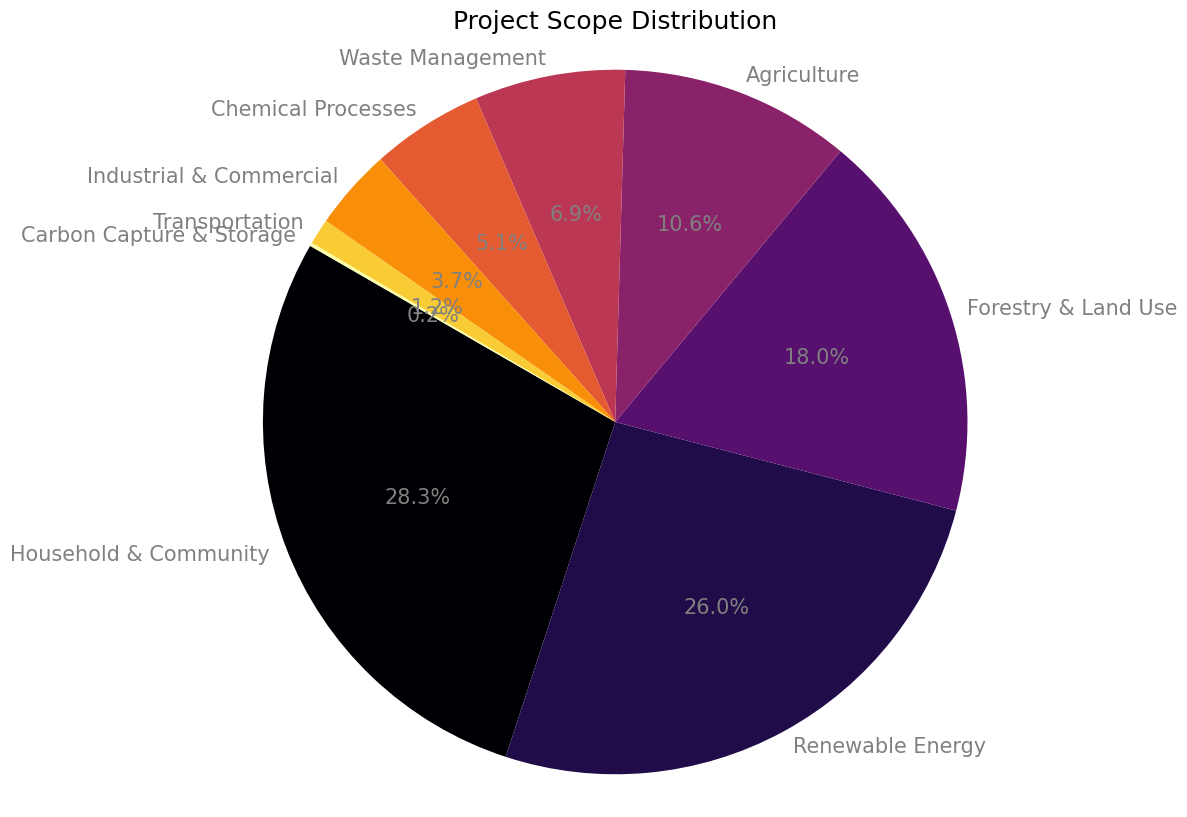

In [424]:

# Convert the Series to a DataFrame
df_scope_counts = scope_counts.reset_index()
df_scope_counts.columns = ['scope', 'count']

df_scope_counts.set_index('scope', inplace=True)

# Plotting the pie chart
plt.figure(figsize=(10, 10))

pie = df_scope_counts['count'].plot.pie(
    autopct='%1.1f%%', 
    startangle=120, 
    cmap='inferno',  # Using the 'plasma' colormap
    title='Project Scope Distribution', 
    labeldistance=1.05,
    textprops={'color': "grey", 'fontsize': 15}
)

plt.ylabel('')  # Remove y-axis label
# Increase label font size
plt.rcParams['font.size'] = 15.0
# Ensuring the pie is a circle
plt.axis('equal')

# Display the chart
plt.show()

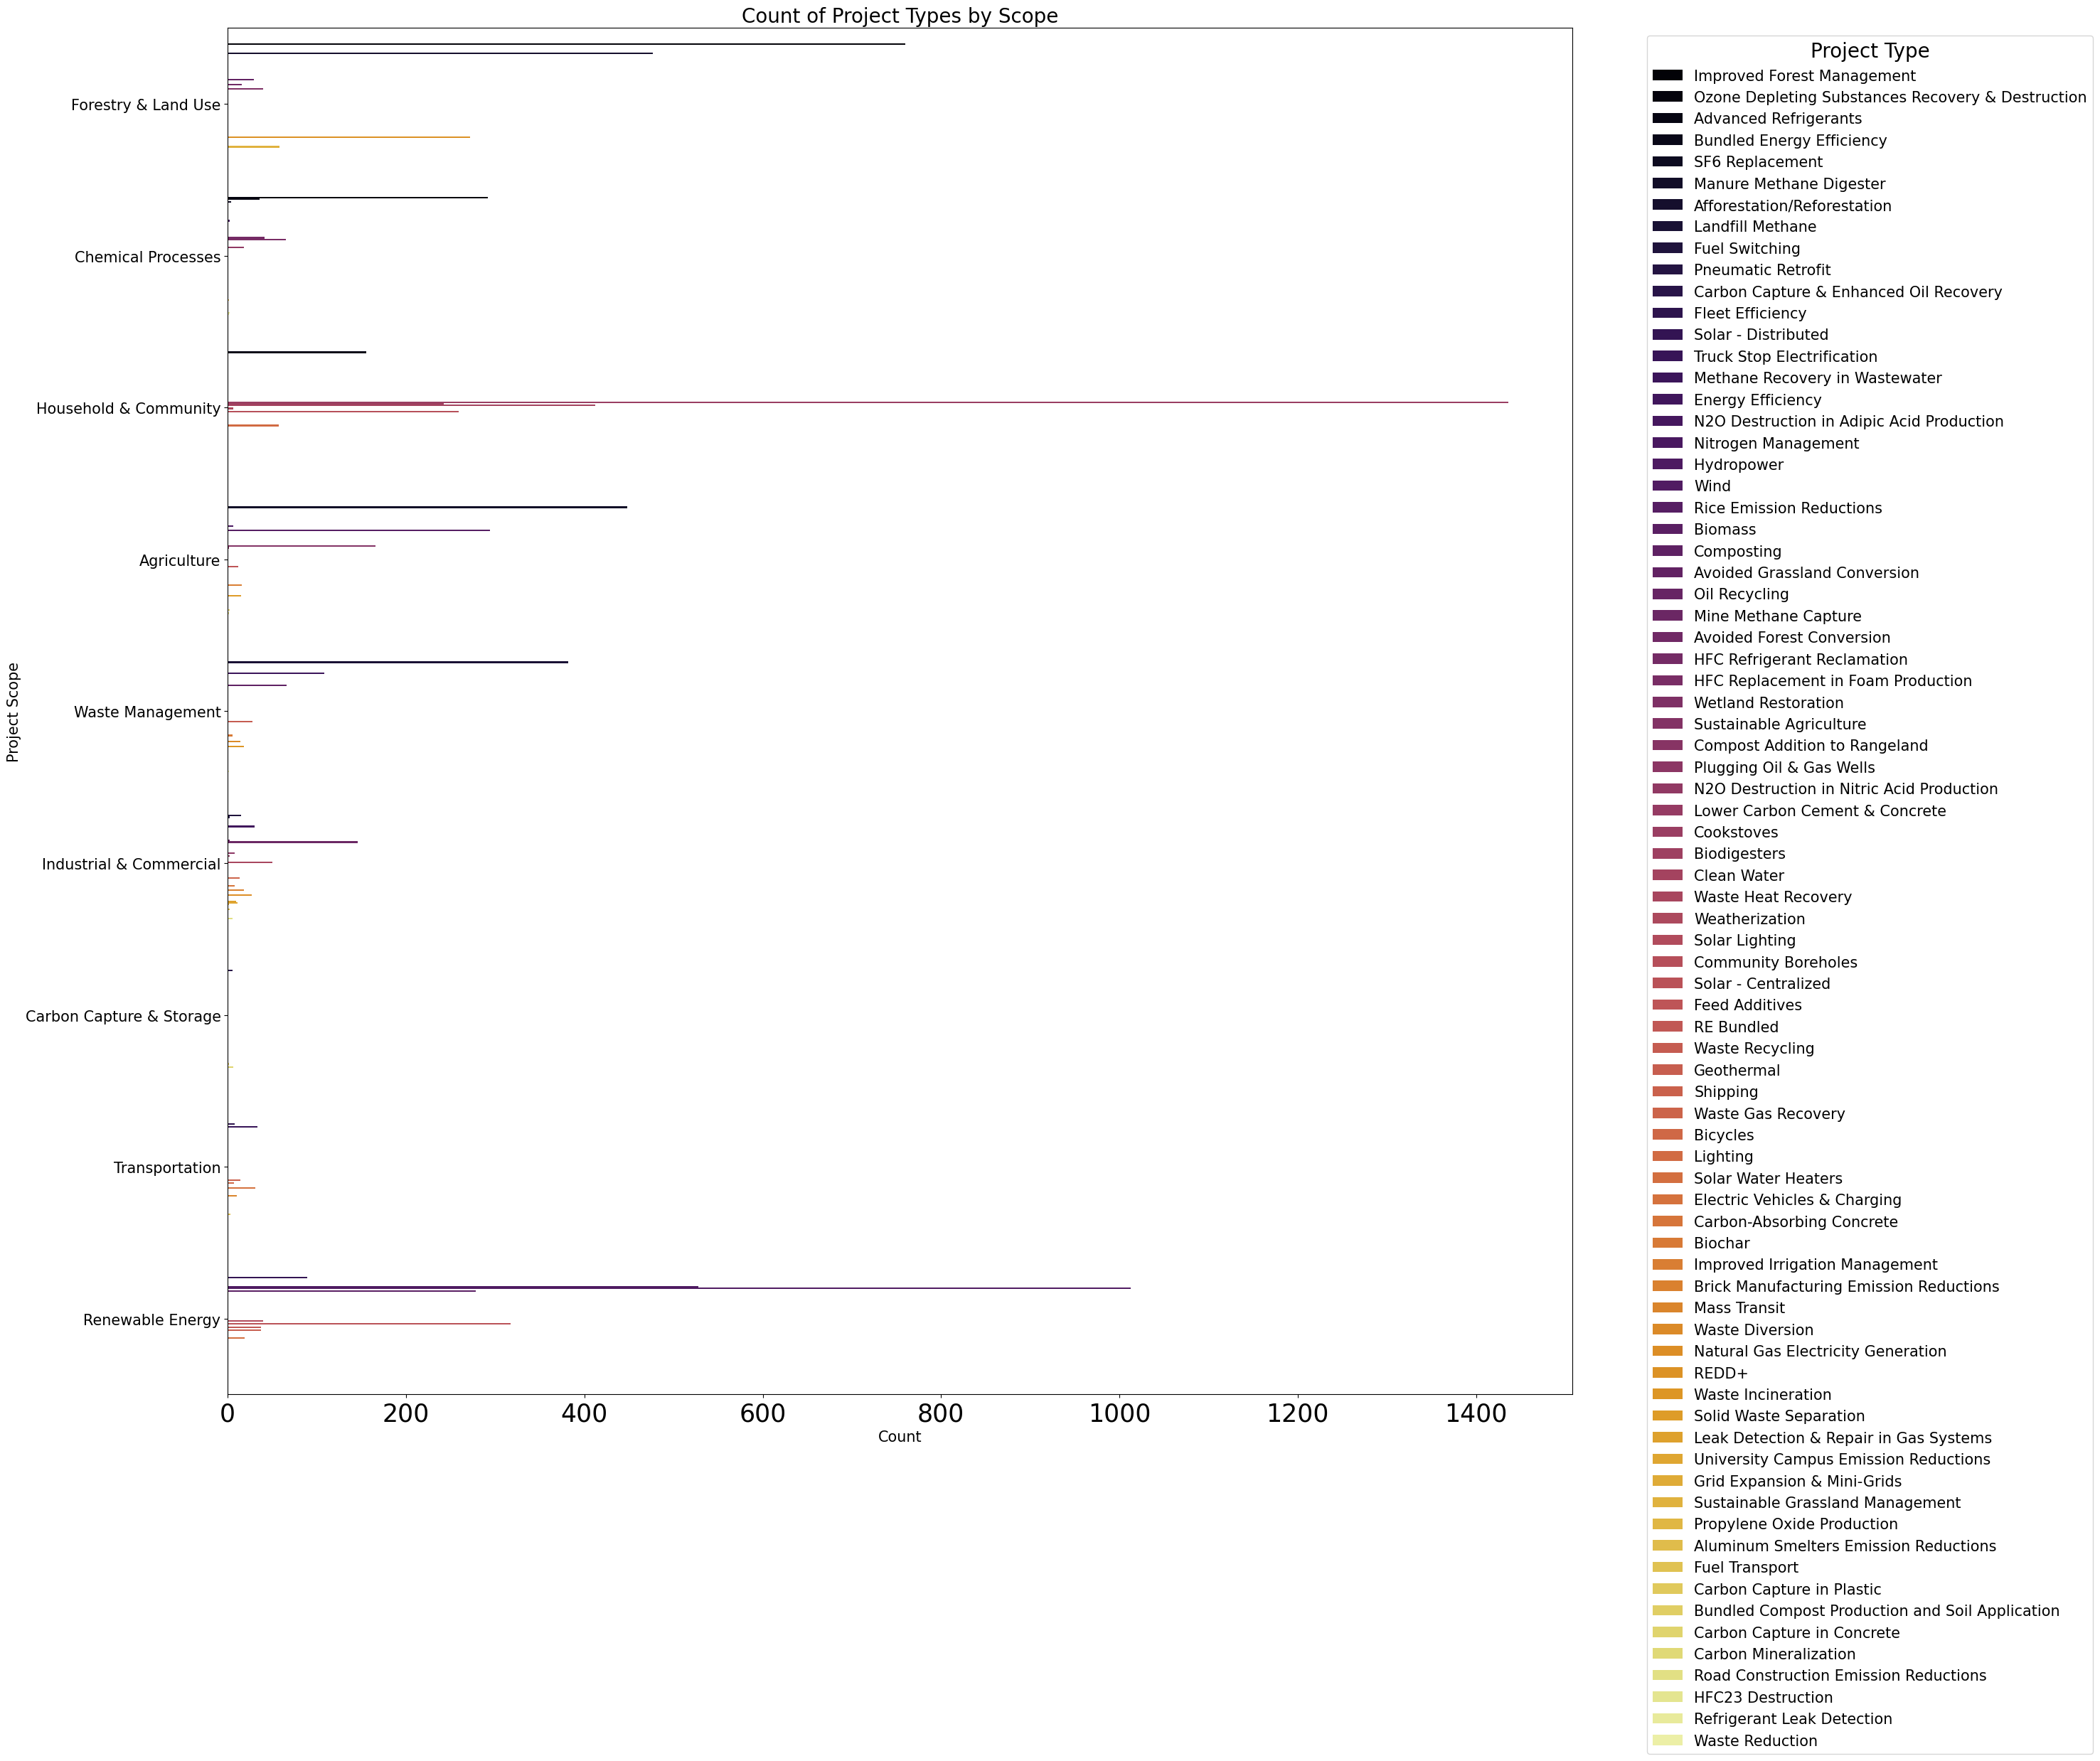

In [380]:
# Create a bar plot
plt.figure(figsize=(30, 25))
sns.countplot(data=projects_df, y='scope', hue='type', palette='inferno',linewidth=5)
plt.title('Count of Project Types by Scope', fontsize=20)
plt.ylabel('Project Scope', fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.xticks(fontsize=25)
plt.legend(title='Project Type', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='20')
plt.tight_layout()
plt.show()

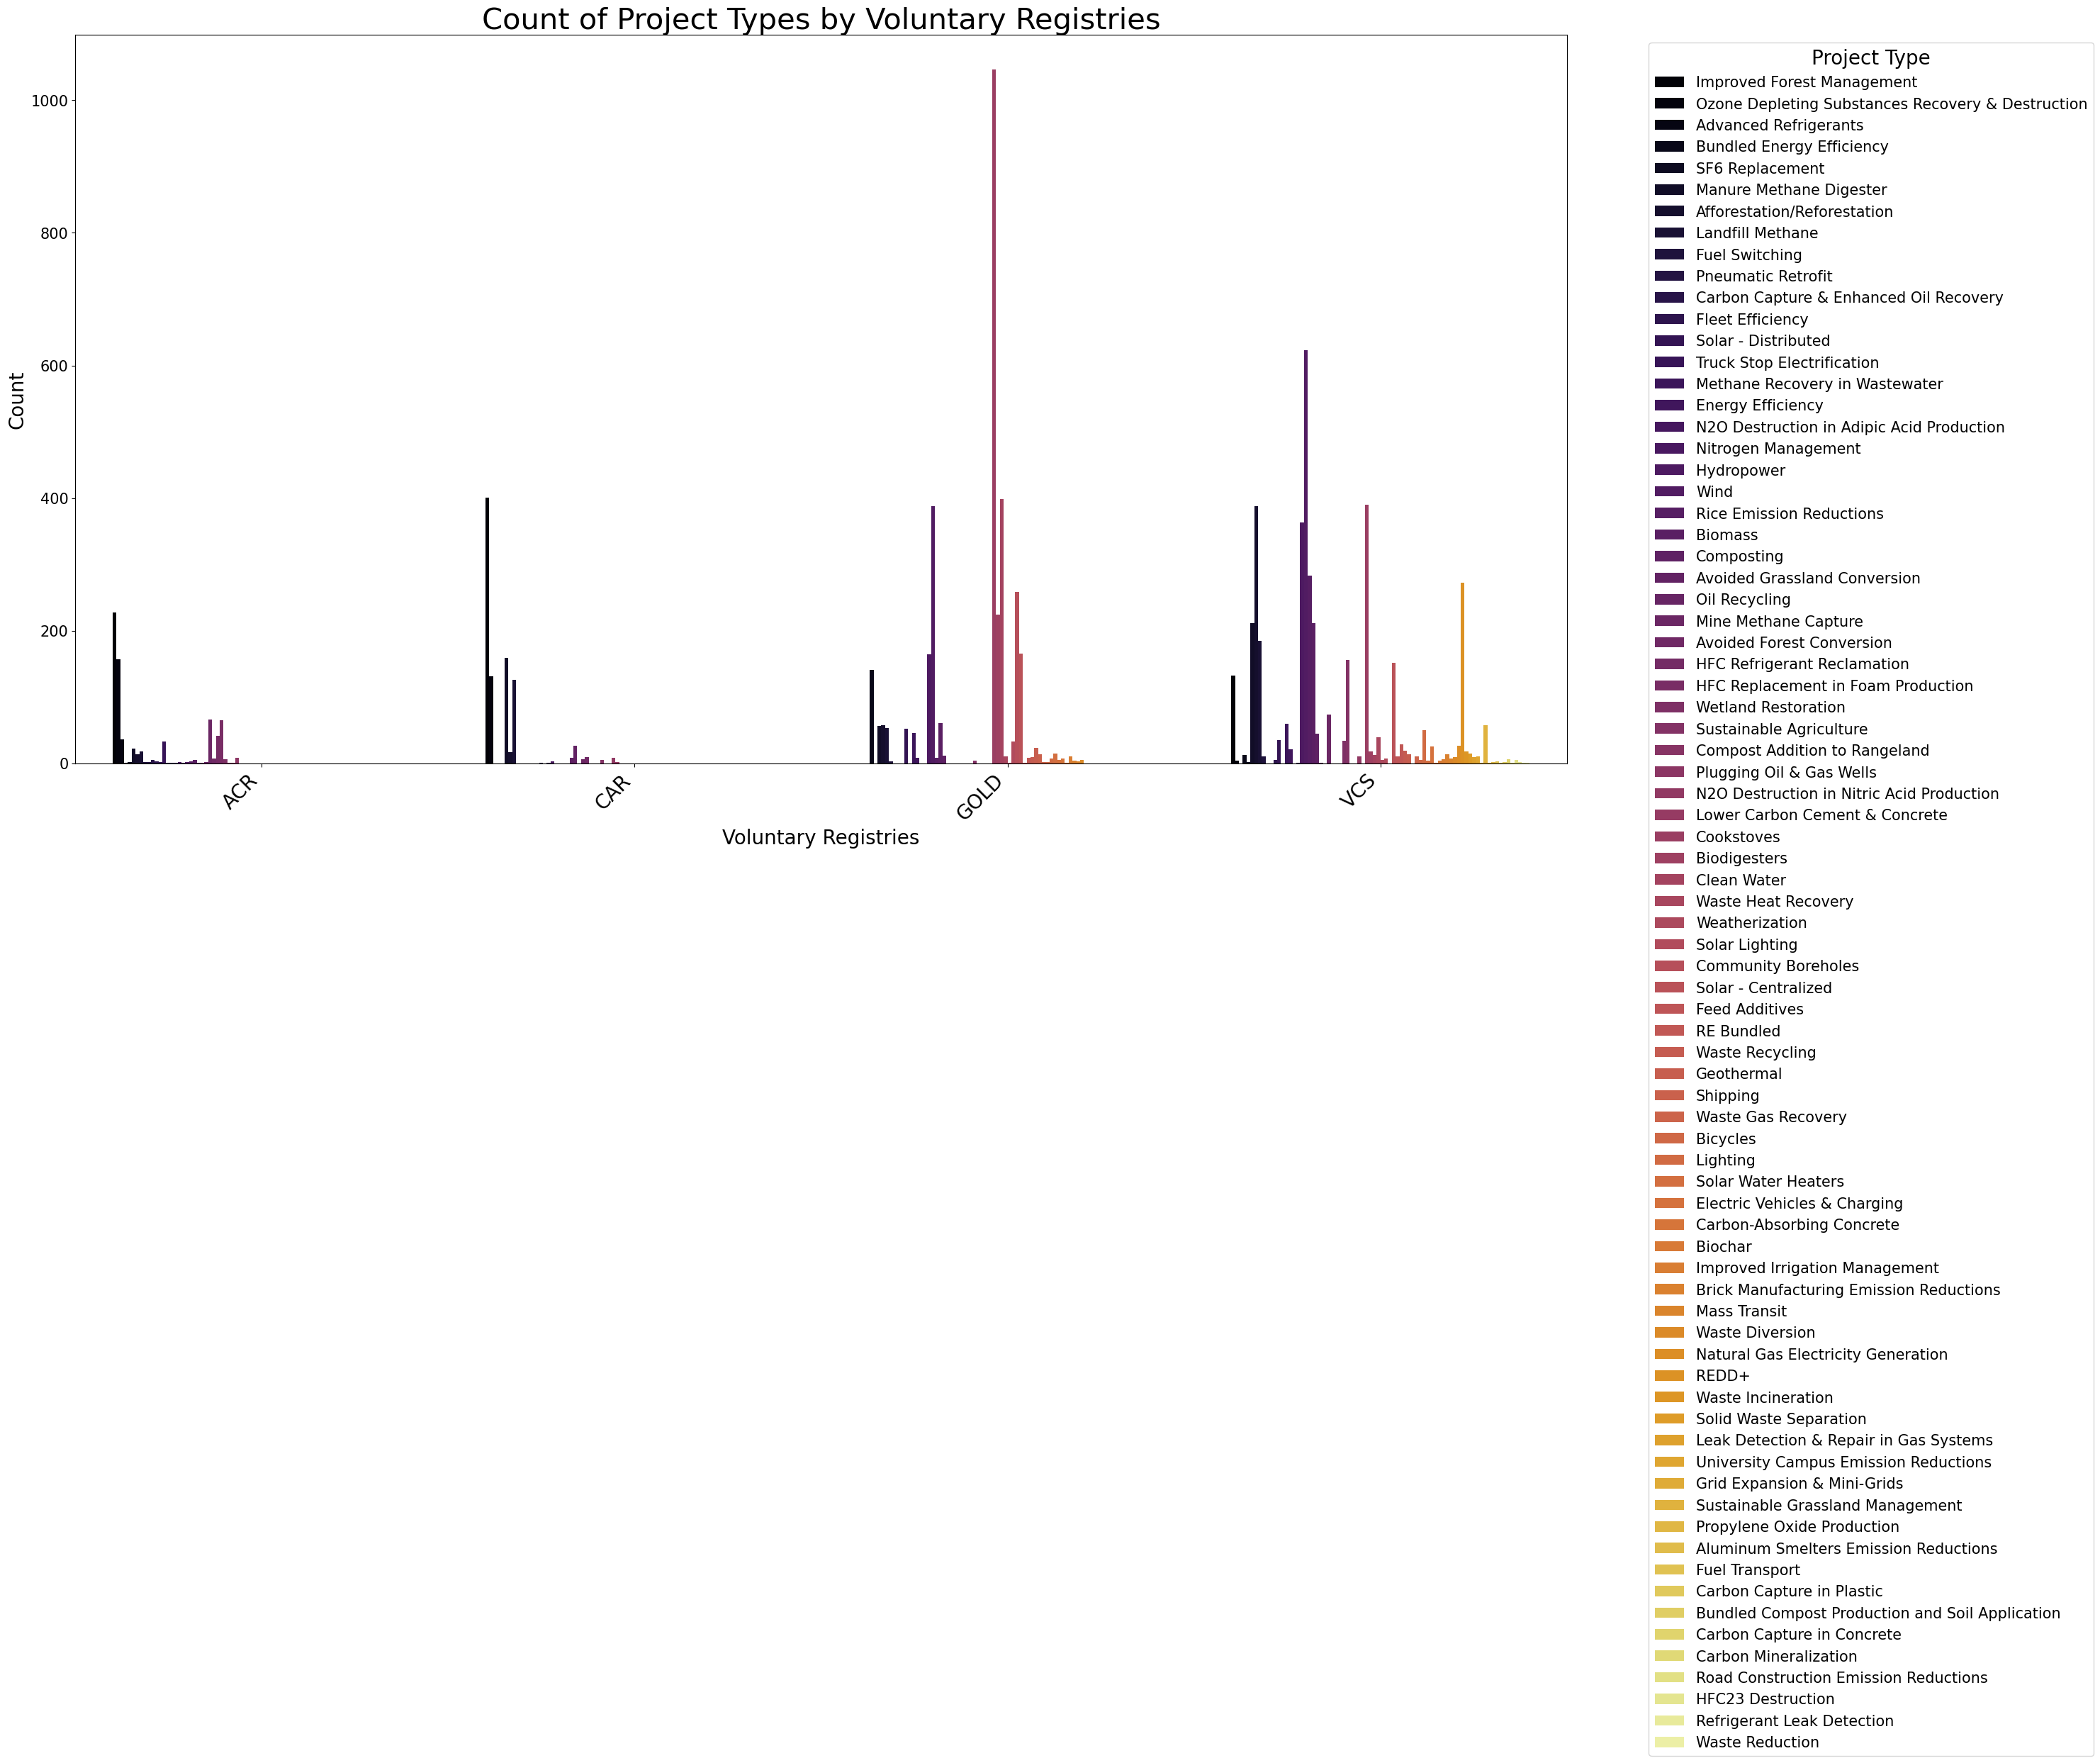

In [381]:
# Create a bar plot
plt.figure(figsize=(30, 20))
sns.countplot(data=projects_df, x='voluntary_registry', hue='type', palette='inferno')
plt.title('Count of Project Types by Voluntary Registries',fontsize=30)
plt.xlabel('Voluntary Registries',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=20)
plt.legend(title='Project Type', bbox_to_anchor=(1.05, 1), loc='upper left',title_fontsize='20')
plt.tight_layout()
plt.show()

In [382]:
#Dropping the features which are not important for correlation such as Project ID

In [384]:
columns_dropped = ["added_to_database_version_-_with_data_through",
"unnamed:_158",
"1st_issuance_yr_(no_hard_code,_hide)",
"unnamed:_160", 
"reversals_covered_by_buffer_pool",
"reversals_not_covered_by_buffer",
"first_year_of_project_(vintage)",
"year_unknown",
"pers",
"arb_id",
"poa_idoraggregate_id", "project_id"
]
# Dropping the specified columns
projects_df.drop(columns=columns_dropped, inplace=True)


In [385]:
projects_df.shape

(9089, 33)

In [388]:
projects_df.dtypes

project_name                                  object
voluntary_registry                            object
arborwaproject                                object
voluntary_status                              object
scope                                         object
type                                          object
reduction_or_removal                          object
methodology_or_protocol                       object
region                                        object
country                                       object
state                                         object
project_site_location                         object
project_developer                             object
total_credits_issued                           int64
total_credits_retired                          int64
total_credits_remaining                        int64
total_buffer_pool_deposits                     int64
project_owner                                 object
offset_project_operator                       

## Data Cleanup and preprocess
Handling missing data (imputation, deletion)
Encoding categorical variables (one-hot encoding, label encoding)
Scaling numerical features (standardization, normalization)
Handling outliers
Feature engineering (creating new features, transforming existing ones)

## Data Split

In [420]:
from sklearn.model_selection import train_test_split
# Separate features and target
X = projects_df.drop(['type'], axis=1)
y = projects_df['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [421]:
#print shape of the split dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7271, 44) (1818, 44) (7271,) (1818,)


ValueError: could not convert string to float: "Doyon Ts'oo"